In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [ ]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

validation__ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation__ds.map(process)

In [ ]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid' ,activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid' ,activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid' ,activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 1546s 2s/step - loss: 0.7151 - accuracy: 0.6496 - val_loss: 0.7142 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 1549s 2s/step - loss: 0.5055 - accuracy: 0.7510 - val_loss: 0.5121 - val_accuracy: 0.7554
Epoch 3/10
625/625 [==============================] - 1548s 2s/step - loss: 0.4161 - accuracy: 0.8057 - val_loss: 0.4418 - val_accuracy: 0.7882
Epoch 4/10
625/625 [==============================] - 1512s 2s/step - loss: 0.3456 - accuracy: 0.8470 - val_loss: 0.4974 - val_accuracy: 0.7714
Epoch 5/10
625/625 [==============================] - 1502s 2s/step - loss: 0.2581 - accuracy: 0.8898 - val_loss: 0.7206 - val_accuracy: 0.7166
Epoch 6/10
625/625 [==============================] - 1519s 2s/step - loss: 0.1828 - accuracy: 0.9269 - val_loss: 0.7369 - val_accuracy: 0.7676
Epoch 7/10
625/625 [==============================] - 1517s 2s/step - loss: 0.1226 - accuracy: 0.9538 - val_loss: 0.7851 - val_accuracy:

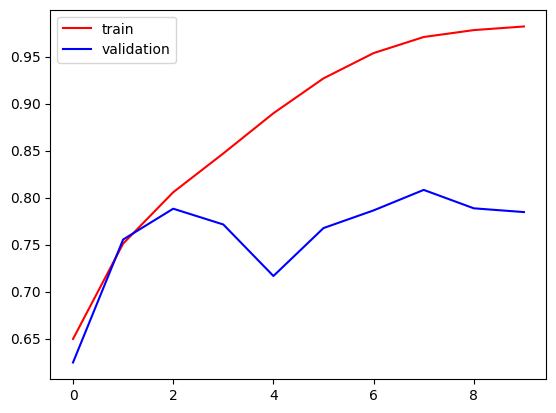

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

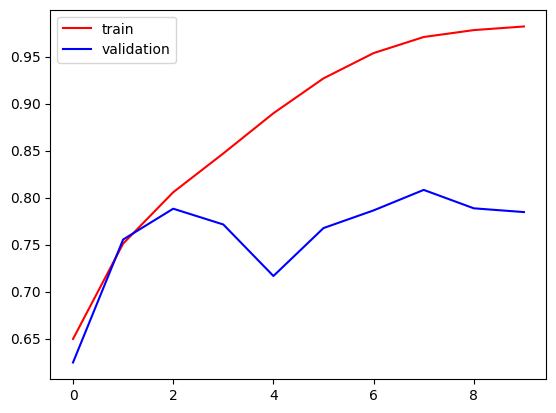

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

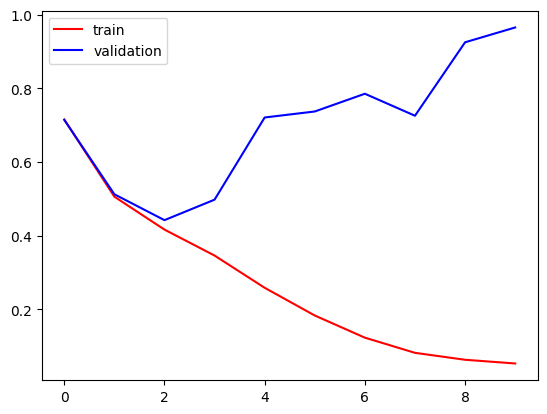

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

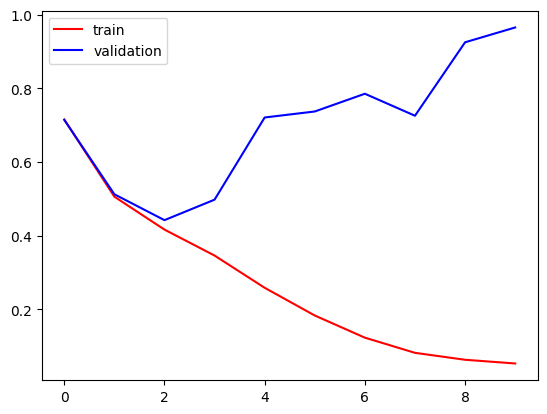

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity

#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/133-1332543_2880x1800-baby-cat-wallpapers-mobile-data-id-data.jpg')

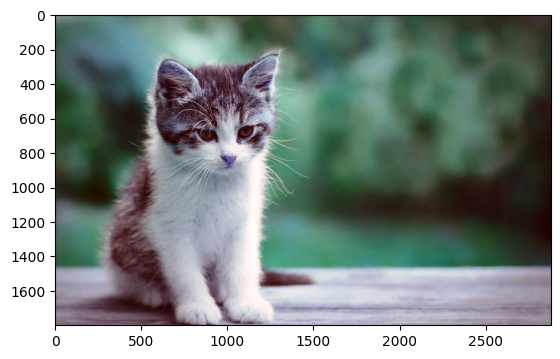

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(1800, 2880, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 175ms/step


array([[0.]], dtype=float32)